# An Analytical Detective

## Problem 1.1 - Loading the Data
Read the dataset mvtWeek1.csv into Python, and call the data frame "mvt". 
Remember to navigate to the directory on your computer containing the file mvtWeek1.csv first. It may take a few minutes to read in the data, since 
it is pretty large.

In [1]:
import pandas as pd
import seaborn as sns


mvt = pd.read_csv('../data/mvtWeek1.csv', low_memory=True)
mvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   191641 non-null  int64  
 1   Date                 191641 non-null  object 
 2   LocationDescription  191641 non-null  object 
 3   Arrest               191641 non-null  bool   
 4   Domestic             191641 non-null  bool   
 5   Beat                 191641 non-null  int64  
 6   District             148589 non-null  object 
 7   CommunityArea        167038 non-null  object 
 8   Year                 191641 non-null  int64  
 9   Latitude             189365 non-null  float64
 10  Longitude            189365 non-null  float64
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 13.5+ MB


C:\Users\amuly\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


How many rows of data (observations) are in this dataset?

In [2]:
mvt.shape[0]

191641

## Problem 1.2 - Loading the Data
How many variables are in this dataset?

In [3]:
mvt.shape[1]

11

## Problem 1.3 - Loading the Data
What is the maximum value of the variable "ID"?

In [4]:
mvt['ID'].max()

9181151

## Problem 1.4 - Loading the Data
What is the minimum value of the variable "Beat"?

In [5]:
mvt['Beat'].min()

111

## Problem 1.5 - Loading the Data
How many observations have value TRUE in the Arrest variable (this is the number of crimes for which an arrest was made)?

In [6]:
mvt['Arrest'].sum()

15536

## Problem 1.6 - Loading the Data
How many observations have a LocationDescription value of ALLEY?

In [7]:
mvt[mvt['LocationDescription']=='ALLEY']['LocationDescription'].count()

2308

## Problem 2.1 - Understanding Dates in Python
In what format are the entries in the variable Date?

In [8]:
mvt['Date'][0]

'12/31/12 23:15'

## Problem 2.2 - Understanding Dates in Python
What is the month and year of the median date in our dataset? Enter your answer as "Month Year", without the quotes.

In [9]:
date_convert = pd.to_datetime(mvt['Date'])

median_len = (len(date_convert)+1)/2
date_convert[median_len].strftime('%B %Y')

'May 2006'

## Problem 2.3 - Understanding Dates in Python
Now, let's extract the month and the day of the week, and add these variables to our data frame mvt.

In which month did the fewest motor vehicle thefts occur?

In [10]:
mvt['Date'] = date_convert
mvt['Month'] = mvt['Date'].dt.strftime('%B')
mvt['Weekday'] = mvt['Date'].dt.strftime('%A')

mvt['Month'].value_counts().sort_values().head(1)

February    13511
Name: Month, dtype: int64

## Problem 2.4 - Understanding Dates in Python
On which weekday did the most motor vehicle thefts occur?

In [11]:
mvt['Weekday'].value_counts().sort_values().tail(1)

Friday    29284
Name: Weekday, dtype: int64

## Problem 2.5 - Understanding Dates in Python
Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made?

In [12]:
mvt[mvt['Arrest']==True].groupby('Month')['Arrest'].sum().sort_values().tail(1)

Month
January    1435
Name: Arrest, dtype: int64

## Problem 3.1 - Visualizing Crime Trends
Now, let's make some plots to help us better understand how crime has changed over time in Chicago.

First, let's make a histogram of the variable Date.

Looking at the histogram, answer the following questions.

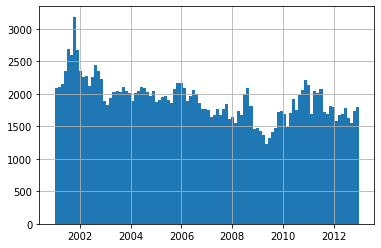

In [13]:
mvt['Date'].hist(bins=100);

In general, does it look like crime increases or decreases from 2002 - 2012?
- Decreases

In general, does it look like crime increases or decreases from 2005 - 2008?
- Decreases

In general, does it look like crime increases or decreases from 2009 - 2011?
- Increases

## Problem 3.2 - Visualizing Crime Trends
Now, let's see how arrests have changed over time. Create a boxplot of the variable "Date", sorted by the variable "Arrest". 

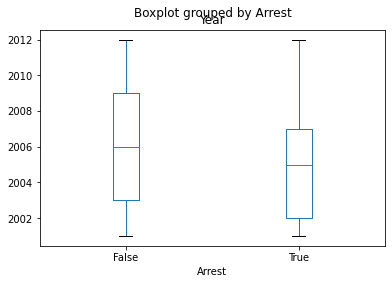

In [14]:
mvt.boxplot('Year', by='Arrest', grid=False);

Does it look like there were more crimes for which arrests were made in the first half of the time period or the second half of the time period? (Note that the time period is from 2001 to 2012, so the middle of the time period is the beginning of 2007.)
- First half

## Problem 3.3 - Visualizing Crime Trends
For what proportion of motor vehicle thefts in 2001 was an arrest made?

In [15]:
mvt[mvt['Year']==2001]['Arrest'].mean()

0.10411727708161982

## Problem 3.4 - Visualizing Crime Trends
For what proportion of motor vehicle thefts in 2007 was an arrest made?

In [16]:
mvt[mvt['Year']==2007]['Arrest'].mean()

0.08487394957983194

## Problem 3.5 - Visualizing Crime Trends
For what proportion of motor vehicle thefts in 2012 was an arrest made?

In [17]:
mvt[mvt['Year']==2012]['Arrest'].mean()

0.03902923644621062

## Problem 4.1 - Popular Locations
Analyzing this data could be useful to the Chicago Police Department when deciding where to allocate resources. If they want to increase the number of arrests that are made for motor vehicle thefts, where should they focus their efforts?

Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category? You should select 5 of the following options.

In [18]:
mvt['LocationDescription'].value_counts().sort_values(ascending=False).head(6)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

## Problem 4.2 - Popular Locations
Create a subset of your data, only taking observations for which the theft happened in one of these five locations, and call this new data set "Top5".

Alternately, you could create five different subsets, and then merge them together into one data frame using rbind.

How many observations are in Top5?

In [19]:
locations = [
    'STREET', 
    'PARKING LOT/GARAGE(NON.RESID.)',
    'ALLEY',
    'GAS STATION',
    'DRIVEWAY - RESIDENTIAL'
]
top5 = mvt[
    (mvt['LocationDescription']==locations[0])
    | (mvt['LocationDescription']==locations[1])
    | (mvt['LocationDescription']==locations[2])
    | (mvt['LocationDescription']==locations[3])
    | (mvt['LocationDescription']==locations[4])
]
top5.shape[0]


177510

## Problem 4.3 - Popular Locations
One of the locations has a much higher arrest rate than the other locations. Which is it? Please enter the text in exactly the same way as how it looks in the answer options for Problem 4.1.

In [20]:
top5.groupby('LocationDescription')['Arrest'].mean().sort_values(ascending=False)

LocationDescription
GAS STATION                       0.207958
PARKING LOT/GARAGE(NON.RESID.)    0.107932
ALLEY                             0.107886
DRIVEWAY - RESIDENTIAL            0.078806
STREET                            0.074059
Name: Arrest, dtype: float64

## Problem 4.4 - Popular Locations
On which day of the week do the most motor vehicle thefts at gas stations happen?

In [21]:
top5[top5['LocationDescription']=='GAS STATION'].groupby('Weekday')['Arrest']\
    .count().sort_values(ascending=False).head(1)

Weekday
Saturday    338
Name: Arrest, dtype: int64

## Problem 4.5 - Popular Locations
On which day of the week do the fewest motor vehicle thefts in residential driveways happen?

In [22]:
top5[top5['LocationDescription']=='DRIVEWAY - RESIDENTIAL']\
    .groupby('Weekday')['Arrest'].count().sort_values().head(1)

Weekday
Saturday    202
Name: Arrest, dtype: int64